# Stack

last-in, first-out (LIFO), first-in, last-out (FILO) 

1. push ——insert on the top of the stack (the new element is the new top)
2. pop —— remove the top element (the last element inserted)
3. peek —— return the top element (does not remove it)

In [4]:
"""
Stack Data Structure.
Implementation using Array
"""
class Empty(Exception):
    """Error attempting to access an element from an empty container""" 
    #IndexError when accessing empty list is not appropriate for a stack that has no indices
    pass
class Stack():
    def __init__(self):
        self.__items = []
    def __len__(self):
        """call it using len(Stack instance name)"""
        return len(self.__items)

    def push(self, item):
        self.__items.append(item)

    def pop(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self.__items.pop()
    
    def is_empty(self):
        return len(self.__items)== 0
    
    def peek(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self.__items[-1]
    def get_stack(self):
        return self.__items

myStack = Stack()
print(myStack.is_empty()) 
#myStack.pop()
myStack.push("A")
myStack.push("B")
print(myStack.get_stack())
print(myStack.is_empty()) 
myStack.push("C")
print(myStack.get_stack())
myStack.pop()
print(myStack.get_stack())
print(myStack.peek())  
len(myStack)

True
['A', 'B']
False
['A', 'B', 'C']
['A', 'B']
B


2

['A', 'B'] means A is at the bottom of the stack, and B is on the top.

## Leetcode practice:
1. Valid Parentheses
https://leetcode.com/problems/valid-parentheses/

### Some application:
reverse data
1. reverse string
2. Convert Decimal Integer to Binary
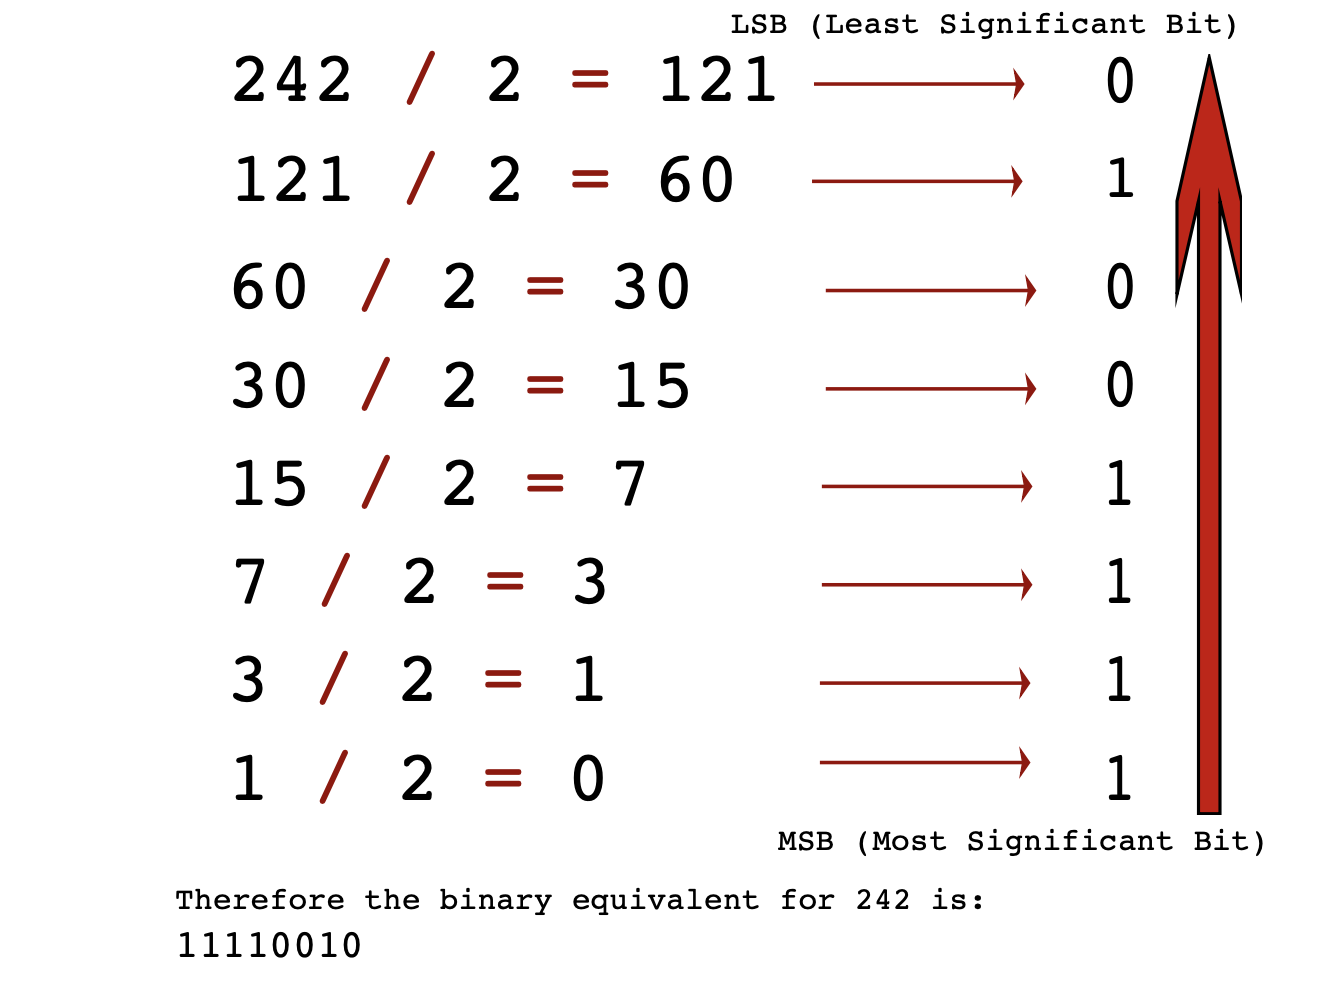

In [12]:
def convert_int_to_bin(dec_num):
    result=''
  
    stack=Stack()
    while dec_num!=0:
    
        remain=dec_num%2
        stack.push(remain)
        dec_num=dec_num//2
    while not stack.is_empty():
        result+=str(stack.pop())
    return result

In [13]:
convert_int_to_bin(242)

'11110010'

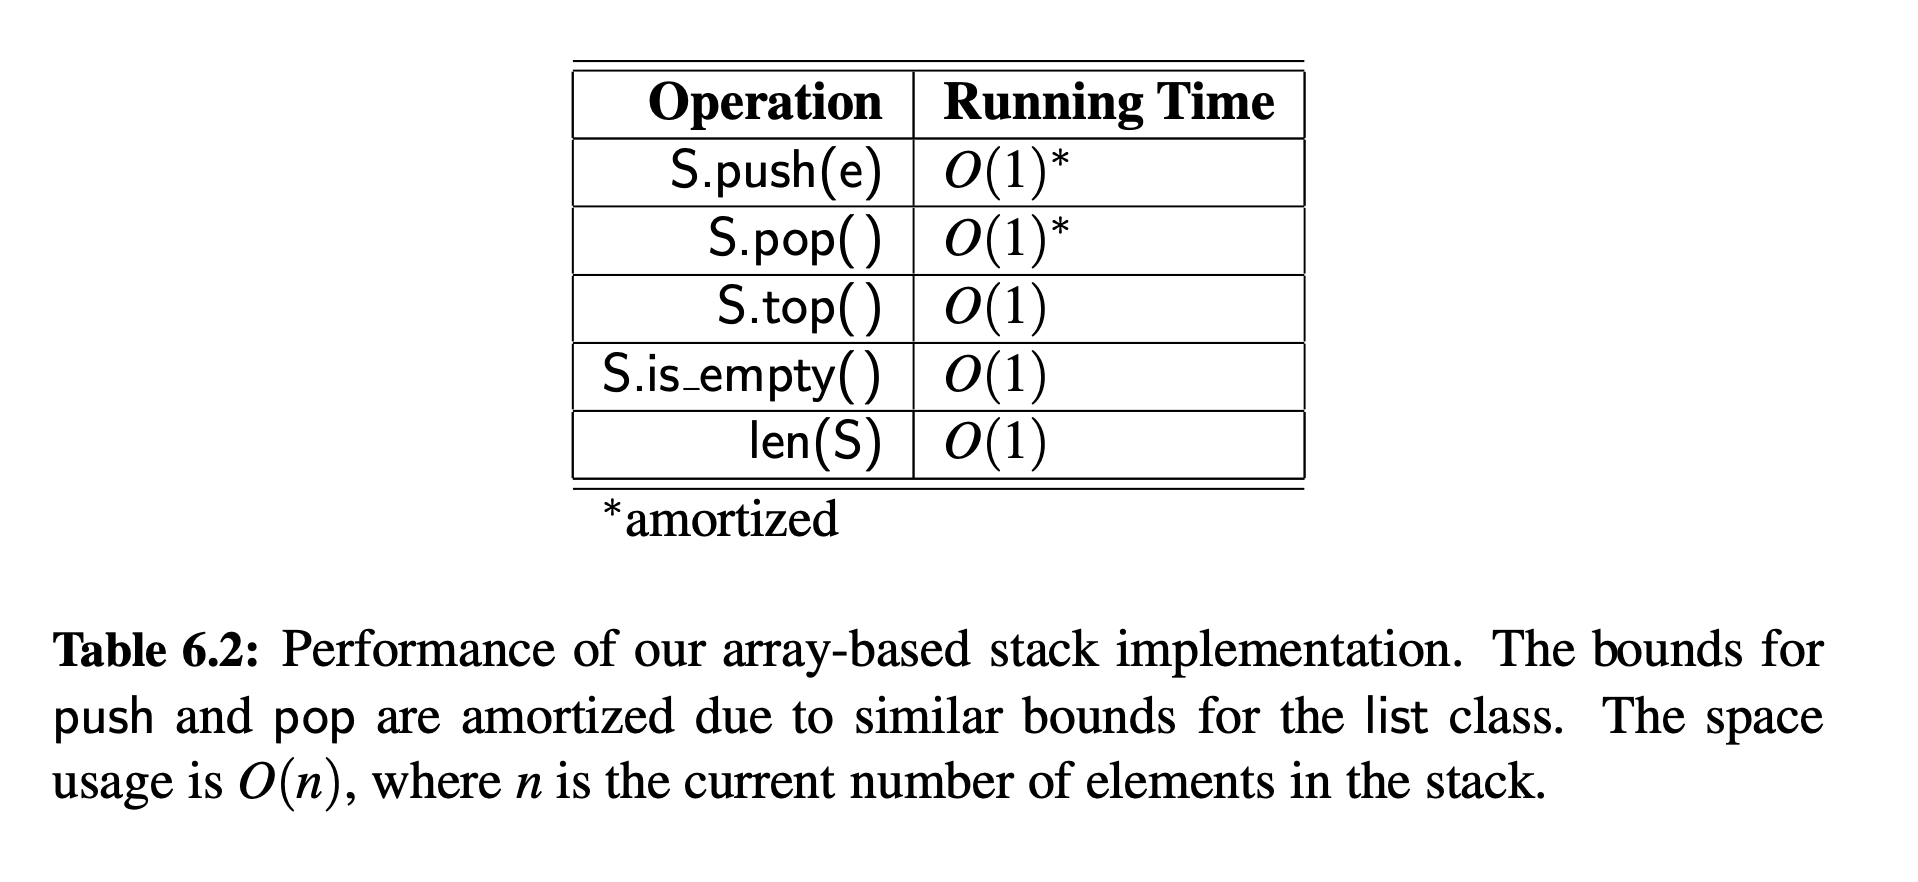
we suggest maintaining a separate integer as an instance variable that denotes the current number of elements in the stack.

### Implementation using collections.deque:

The biggest issue of implementating using list is that it can run into speed issues as it grows. The items in the list are stored next to each other in memory, if the stack grows bigger than the block of memory that currently holds it, then Python needs to do some memory allocations. This can lead to some append() calls taking much longer than other ones.

Python stack can be implemented using the deque class from the collections module. Deque is preferred over the list in the cases where we need quicker append and pop operations from both the ends of the container, as deque provides an O(1) time complexity for append and pop operations as compared to list which provides O(n) time complexity. 

In [3]:
from collections import deque
 
stack = deque()
 
# append() function to push
# element in the stack
stack.append('a')
stack.append('b')
stack.append('c')
 
print('Initial stack:')
print(stack)
 
# pop() function to pop
# element from stack in
# LIFO order
print('\nElements popped from stack:')
print(stack.pop())
print(stack.pop())
print(stack.pop())
 
print('\nStack after elements are popped:')
print(stack)
    

Initial stack:
deque(['a', 'b', 'c'])

Elements popped from stack:
c
b
a

Stack after elements are popped:
deque([])


# Queue

First-in-first-out (FIFO)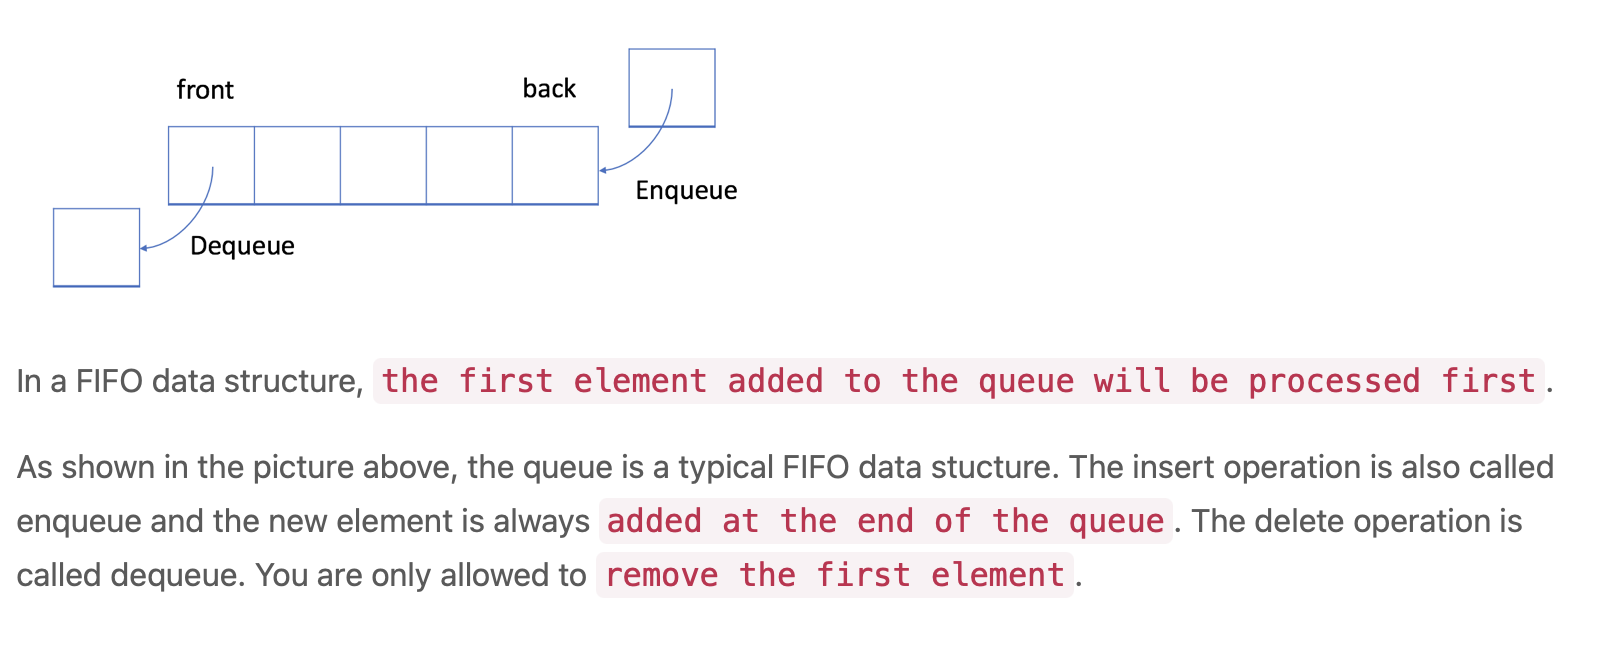
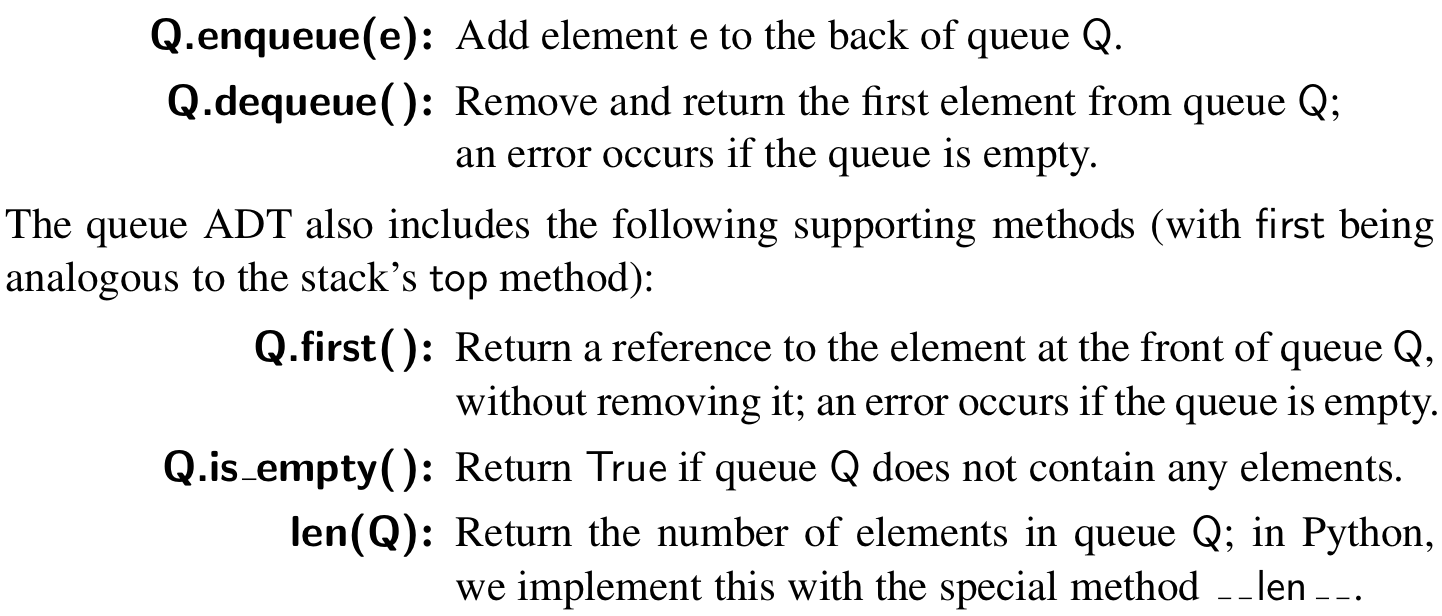

### Implementation:
If using array like the stack with pop(0) to dequeue, the time complexity will always be $O(N)$ (cause all elements left will be shifted left). Although we can improve is by replacing the dequeued entry with a None, and main a pointer to point to the current index of the front of the queue. But this can cause another inefficient usage of space problem. That is, the actual queue might be quite small (the number of elements in the queue can be small) while the list can grow very long. This design would have detrimental consequences in applications in which queues have relatively modest size, but which are used for long periods of time. 

---> To develop a more robust queue, use an Array circularly.

In [2]:
class ArrayQueue:
    """FIFO queue implementation using a Python list as underlying storage"""
    DEFAULT_CAPACITY=10
    def __init__(self):
        """Create an empty queue"""
        self._data=[None]*ArrayQueue.DEFAULT_CAPACITY
        self._size=0
        self._front=0
    def __len__(self):
        """Return the number of elements in the queue"""
        return self._size
    def is_empty(self):
        "Return True if the queue is empty"
        return self._size==0
    def first(self):
        """Return (but not remove) the element at the front of the queue.
        Raise Empty Exception if the queue is empty
        """
        if self.is_empty():
            raise Empty('Queue is empty')
        return self._data[self._front]
    def dequeue(self):
        """Remove and return the first element of the queue 
        Raise Empty exception if the queue is empty
        """
        if self.is_empty():
            raise Empty("Queue is empty")
        answer=self._data[self._front]
        self.__data[self._front]=None #help garbage collection
        self.__front=(self._front+1)%len(self.__data)
        self.__size-=1
        if 0<self._size<len(self._data)//4: #reduce the array to half the size to be more space efficient
            self._resize(len(self._data)//2)
        return answer
    def enqueue(self,e):
        """Add an element to the back of the queue"""
        if self.__size==len(self.__data):
            self._resize(2*len(self.data))
        avail=(self._front+self._size)%len(self._data) #compute the location of the next opening 
        self._data[avail]=e
        self._size+=1
    def _resize(self,cap):#we assume cap>=len(self)
        """Resize to a new list of capacity>=len(self)"""
        old=self._data
        self._data=[None]*cap #allocate list with new capacity
        walk=self._front
        for k in range(self._size):  
            self._data[k]=old[walk]
            walk=(1+walk)%len(old)
        self._front=0 #front has been realigned

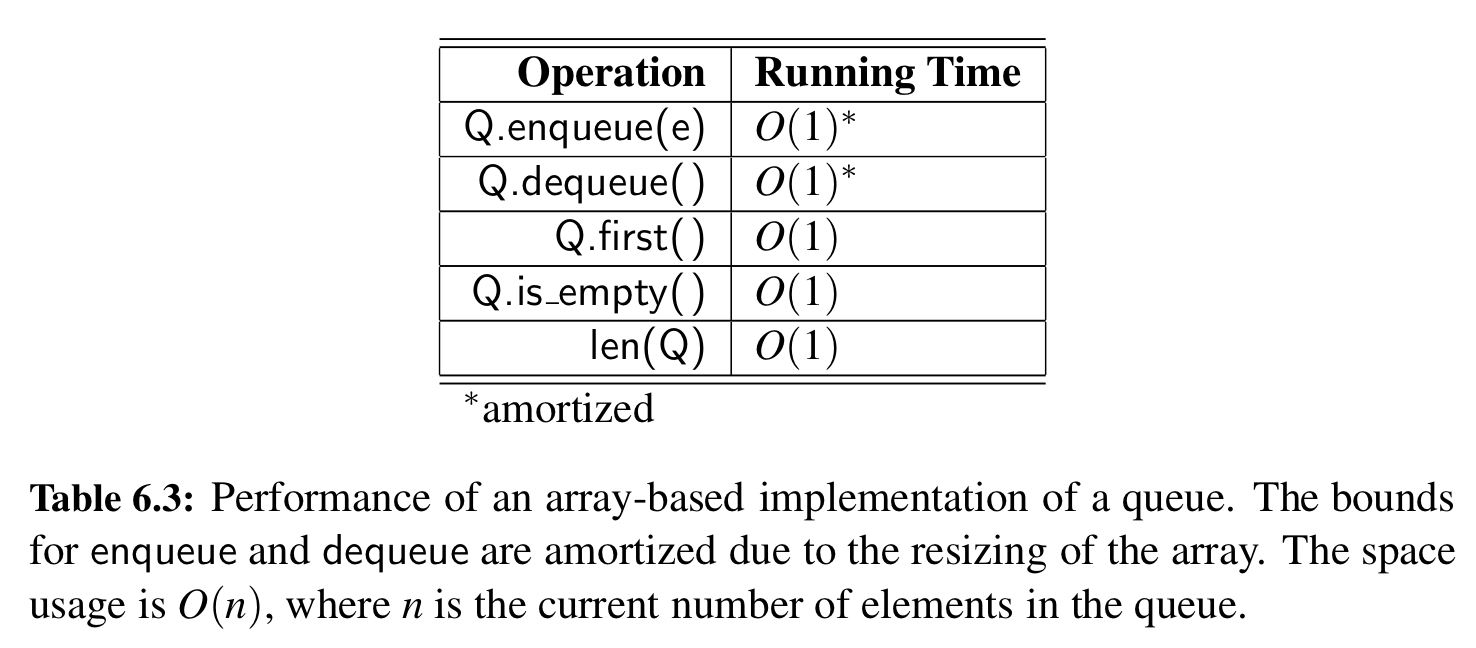

Exercies:
https://leetcode.com/problems/moving-average-from-data-stream/solution/

## Double-Ended Queue
